In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataPath = "/home/maarten/Documents/doctoraat/code/incremunica-evaluation/data.csv"
df = pd.read_csv(dataPath);

In [13]:
df.head()

,joinAlgorithm,datasetName,matchTransformPercentage,scenarioName,operationName,isTransformation,transformationNr,amountOfAdditions,amountOfDeletions,queryTime(seconds),queryTime(nanoseconds),memoryUsed
0,computational-bind-join,inject-1,30,PosLength,batch pos length,False,0,12,0,0.0,697662186.8,231830112.0
1,computational-bind-join,inject-1,30,PosLength,batch pos length,False,1,132,12,0.0,58203716.2,247745348.8
2,computational-bind-join,inject-1,30,PosLength,batch pos length,False,2,8,8,0.0,83454266.6,248459547.2
3,computational-bind-join,inject-1,30,PosLength,batch pos length,False,3,8,8,0.0,100063019.0,251638795.2
4,computational-bind-join,inject-1,30,PosLength,batch pos length,False,4,8,8,0.0,128391983.4,258558400.0


In [14]:
# select the rows where joinAlgorithm is computational-bind-join or memory-bind-join
bindJoinsDf = df[df['joinAlgorithm'].isin(['computational-bind-join', 'memory-bind-join'])]

bindJoinsDf.head()

,joinAlgorithm,datasetName,matchTransformPercentage,scenarioName,operationName,isTransformation,transformationNr,amountOfAdditions,amountOfDeletions,queryTime(seconds),queryTime(nanoseconds),memoryUsed
0,computational-bind-join,inject-1,30,PosLength,batch pos length,False,0,12,0,0.0,697662186.8,231830112.0
1,computational-bind-join,inject-1,30,PosLength,batch pos length,False,1,132,12,0.0,58203716.2,247745348.8
2,computational-bind-join,inject-1,30,PosLength,batch pos length,False,2,8,8,0.0,83454266.6,248459547.2
3,computational-bind-join,inject-1,30,PosLength,batch pos length,False,3,8,8,0.0,100063019.0,251638795.2
4,computational-bind-join,inject-1,30,PosLength,batch pos length,False,4,8,8,0.0,128391983.4,258558400.0


/tmp/ipykernel_47851/603333169.py:14: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


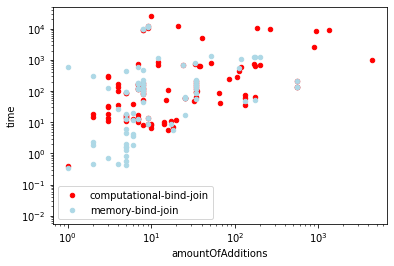

/tmp/ipykernel_47851/603333169.py:24: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


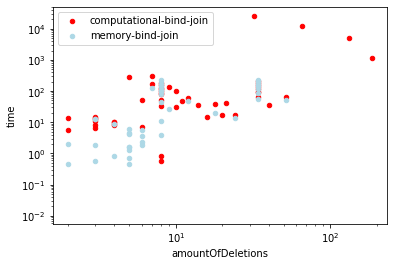

/tmp/ipykernel_47851/603333169.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


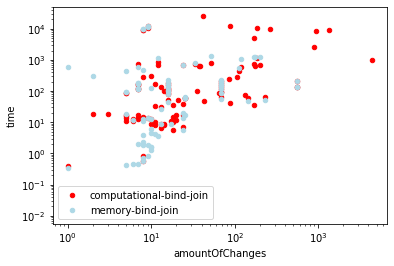

/tmp/ipykernel_47851/603333169.py:44: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in newDf.groupby(['joinAlgorithm']):


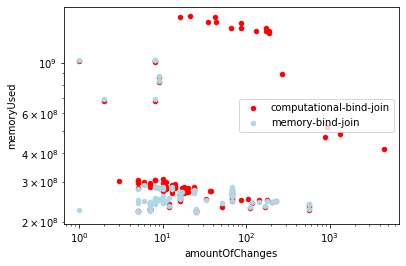

In [15]:
# make a graph where the x-axis has the amount of changes (amountOfAdditions + amountOfDeletions) and the y-axis has the time (queryTime(seconds) * 1000 + queryTime(nanoseconds)/1000)
newDf = pd.DataFrame()
newDf['joinAlgorithm'] = bindJoinsDf['joinAlgorithm']
newDf['amountOfAdditions'] = bindJoinsDf['amountOfAdditions']
newDf['amountOfDeletions'] = bindJoinsDf['amountOfDeletions']
newDf['amountOfAdditions'] = bindJoinsDf['amountOfAdditions']
newDf['amountOfChanges'] = bindJoinsDf['amountOfDeletions'] + bindJoinsDf['amountOfAdditions']
newDf['time'] = bindJoinsDf['queryTime(seconds)'] * 1000 + bindJoinsDf['queryTime(nanoseconds)']/1000000
newDf['memoryUsed'] = bindJoinsDf['memoryUsed']
newDf.head()

#plot for different join algorithms
fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'computational-bind-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfAdditions', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'computational-bind-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfDeletions', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'computational-bind-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfChanges', y='time', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
for key, grp in newDf.groupby(['joinAlgorithm']):
    color = 'lightblue'
    if key == 'computational-bind-join':
        color = 'red'
    ax = grp.plot(ax=ax, kind='scatter', x='amountOfChanges', y='memoryUsed', label=key, color=color)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [16]:
bindJoinsDf = bindJoinsDf[bindJoinsDf['datasetName'].isin(['batch-1', 'inject-1', 'repair-1'])]
bindJoinsDf['queryTime(ms)'] = bindJoinsDf['queryTime(seconds)'] * 1000 + bindJoinsDf['queryTime(nanoseconds)']/1000000

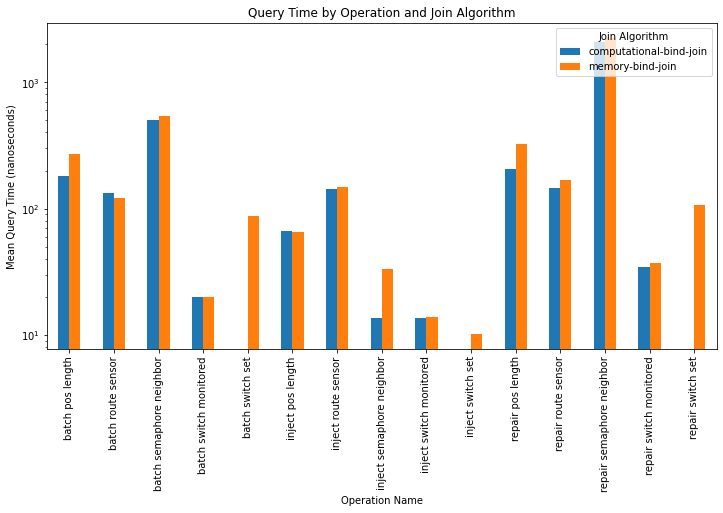

In [17]:
#data = bindJoinsDf[bindJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = bindJoinsDf.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

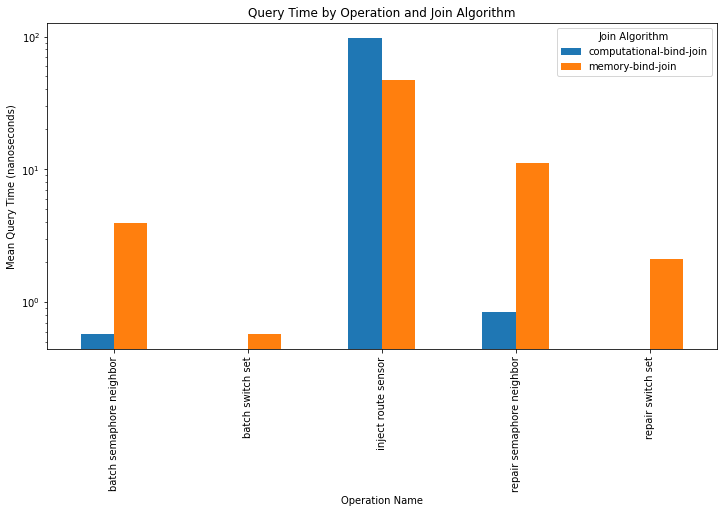

In [24]:
#data = bindJoinsDf[bindJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
data = bindJoinsDf[bindJoinsDf['amountOfAdditions'] < bindJoinsDf['amountOfDeletions']]
grouped_data = data.groupby(['operationName', 'joinAlgorithm'])['queryTime(ms)'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Mean Query Time (nanoseconds)')
plt.title('Query Time by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()

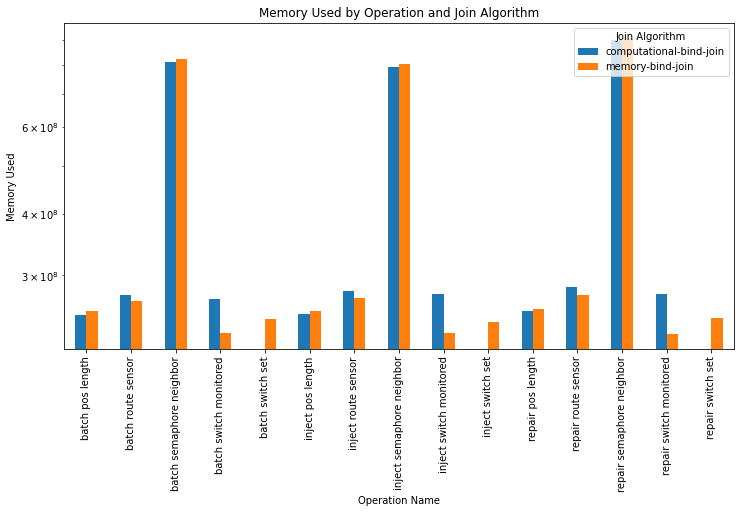

In [18]:
#data = bindJoinsDf[bindJoinsDf['scenarioName'].isin(['PosLength', 'RouteSensor', 'SemaphoreNeighbor', 'SwitchMonitored', 'SwitchSet'])]
grouped_data = bindJoinsDf.groupby(['operationName', 'joinAlgorithm'])['memoryUsed'].mean().unstack()

# Create the bar graph with bars for different joinAlgorithms next to each other
ax = grouped_data.plot(kind='bar', figsize=(12, 6,))

# Customize the plot
plt.xlabel('Operation Name')
plt.ylabel('Memory Used')
plt.title('Memory Used by Operation and Join Algorithm')
plt.legend(title='Join Algorithm', loc='upper right')
plt.yscale('log')
plt.show()